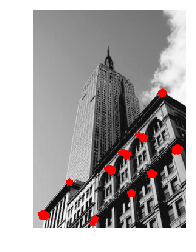

finish


In [3]:
# -*- coding:utf-8 -*-
import numpy
from PIL import Image
from pylab import *
from scipy.ndimage import filters
I=array(Image.open('demo.jpg').convert('L'))
m,n=I.shape
Ix=zeros(I.shape)
Iy=zeros(I.shape)
filters.gaussian_filter(I,(3,3),(0,1),Ix)#边缘提取
filters.gaussian_filter(I,(3,3),(1,0),Iy)
Ixx=multiply(Ix,Ix)
Iyy=multiply(Iy,Iy)
Ixy=multiply(Ix,Iy)
Wxx=filters.gaussian_filter(Ixx,3)#高斯模糊
Wyy=filters.gaussian_filter(Iyy,3)
Wxy=filters.gaussian_filter(Ixy,3)
M=zeros([2,2])
R=zeros(I.shape)
for i in range(m):
    for j in range(n):
        M[0,0]=Wxx[i,j]
        M[1,0]=Wxy[i,j]
        M[0,1]=Wxy[i,j]
        M[1,1]=Wyy[i,j]
        R[i,j]=det(M)-0.06*(trace(M)**2)
coord1=[]
coord2=[]
for i in range(m):
    for j in range(n):
        if R[i,j]>3000:
            coord1.append(i)
            coord2.append(j)
figure()
Im=Image.fromarray(I)
imshow(I,cmap='gray')
plot(coord2,coord1,'r*')
axis('off')
show()
print('finish')